## Lecture 23 - Modeling Data With Least Squares Fitting 
 
A ubiquitous task in engineering and other technical disciplines is the analysis of data.  Data comes from many sources, including measurements in the laboratory and numerical simulations.  In this lecture and the next, we'll apply what we've learned so far to produce **models** of data that we can use to explore trends and make conclusions.  Specifically, in this lecture, we'll develop models based on **least-squares** fitting of model parameters to existing data.  Such fitting may be the right choice when the data in contaminated by noise or when the model need only capture the main features of the observed phenomenon.

### Objectives

By the end of this lesson, you should be able to

- Explain what it means to *model* data
- Explain (and demonstrate) what is meant by a least-squares fit of a linear model $ax+b$ to a set of measured points $(x_i, y_i),\, i = 0, 1, \ldots$.
- Use built-in tools to perform linear, least-squares fitting of data to models
- Use built-in tools to perform nonlinear, least-squares fitting of data to models

## Noisy Data

A familiar task: draw a line of "best fit" through noisy data $(x_i, y_i)$

Alternative description: find $a$ and $b$ so that the *linear model* $y(x) = ax + b$ best matches the data.

In [2]:
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
t = np.sort(np.random.rand(50)*10)
y = 0.25*t**2 + 3*t + 2 + np.random.normal(size=50)*t/2
b = 0
# connect first and last points
a = (y[-1]-y[0])/(t[-1]-t[0])
b = y[0] - a * t[0]
y_a1 = a*t + b
# connect minimum and maximum points
t_max = t[np.where(y==max(y))] # np.where(y==max(y)) is one way 
t_min = t[np.where(y==min(y))] # to find the location of the max
a = (max(y)-min(y))/(t_max-t_min)
b = min(y) - a * t_min
y_a2 = a*t + b

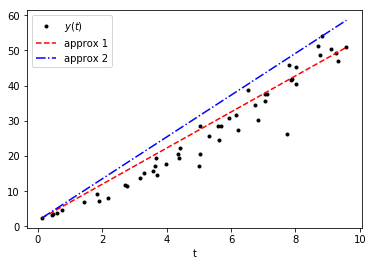

In [3]:
plt.plot(t, y, 'k.', t, y_a1, 'r--', t, y_a2, 'b-.')
plt.legend(["$y(t)$", "approx 1", "approx 2"])
plt.xlabel('t')
plt.show()

## What "Best" Means

The error is the difference between the model and data:

$$
  e_i = y(t_i) - y_i = a t_i + b - y_i \, \quad i = 0, 1, \ldots
$$

A model is the **least-squares, best fit** if it minimizes 

$$
  || \mathbf{e} ||_2 = \sqrt{ |e_0|^2 + |e_1|^2 + \ldots} = \sqrt{\sum_{i=0} |e_i|^2} \,  ,
$$

the $L_2$ norm (or euclidean norm) of the error.  Similar to other error metrics we've seen?

**Exercise**: Compute and plot the errors from example, and compute their L2-norms.

In [ ]:
e_1 =
e_2 = 
norm_e_1 =
norm_e_2 =
plt.plot(t, e_1, 'r--', t, e_2, 'b-.')
plt.legend([r"$||e_1||_2$ = {:.4f}".format(norm_e_1), 
            r"$||e_2||_2$ = {:.4f}".format(norm_e_2)])
plt.xlabel('t')
plt.show()

Given a model $\mathbf{y}_{appx} = \mathbf{Mc} \approx \mathbf{y}$, the parameters $\mathbf{c}$ the minimize the $L_2$ norm of error are found by solving the normal equations:

$$
\mathbf{c} = (\mathbf{M}^T \mathbf{M})^{-1}  \mathbf{M}^T \mathbf{y} \, .
$$


For $y(x) \approx at + b$,  $\mathbf{M} = [\mathbf{x}, \mathbf{1}]$ and $\mathbf{c} = [a, b]^T$.

**Exercise**: Determine the best-fit parameters $a$ and $b$ for the example data above.

## Beyond Linear Models

Not all data is intrinsically linear.  Alternatives:

 - polynomial models $y(x) = a_n x^n + a_{n-1} x^{n-1} +  \ldots + a_0$.
 - problem-specific models, e.g., $y(x) = a_0 e^x + a_1 e^{-x} + a_2$.
 
The key is that the coefficients $a_n$ are weights of separate, nonparameterized functions of $x$.  *Linear* least-squares fitting can be used (just like for $y(x) = ax+b$).  For a quadratic fit $y(x)=ax^2+bx+c$, $\mathbf{M}$ becomes $[\mathbf{x}^2, \mathbf{x}^1, \mathbf{x}^0]$ and $\mathbf{c}$ becomes $\mathbf{c} = [a, b, c]^T$.

For such polynomial fits, use `np.polyfit` and `np.polyval`.

**Example**:  Use `np.polyfit` and `np.polyval` to approximate $\sin^2(x)$ as a linear, quadratic, and cubic polynomial for $x\in [0, 2]$, and plot the approximations.

In [10]:
x = np.linspace(0, 2, 100)
y = np.sin(x)**2
# compute the approximations here


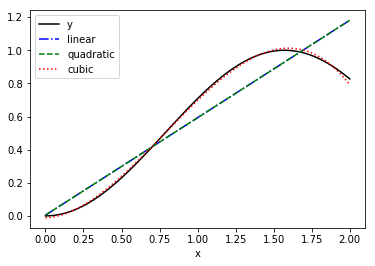

In [11]:
plt.plot(x, y, 'k', x, y_lin, 'b-.', 
         x, y_quad, 'g--', x, y_cub, 'r:')
plt.legend(['y', 'linear', 'quadratic', 'cubic'])
plt.xlabel('x')
plt.show()

## Beyond Polynomial Models

Linear models are common, and polynomial models can provide necessary improvements.  For many cases, neither type of model is sufficient.  

Consider data that needs to be fitted to 

$$
    y(t) = a\sin(bt + c) + d
$$

Because $b$ and $c$ are *inside* a nonlinear function, *linear* least-squares fitting is not applicable.  Rather, we need *nonlinear* least squares via, e.g., `scipy.optimize.curve_fit`.

**Example**:  A recent experiment led to the measurement of reactor powers as a function of time as tabulated below:

| t | P |
|---|---|
| 0.0 | 2.945 |
| 1.0 | 3.964 |
| 2.0 | 4.481 |
| 3.0 | 5.747 |
| 4.0 | 7.523 |
| 5.0 | 8.71 |
| 6.0 | 10.733 |
| 7.0 | 13.91 |
| 8.0 | 16.721 |
| 9.0 | 19.951 |
| 10.0 | 24.61 |

Fit this data to the model $P(t) = ae^{bt}$.  Is there a way we could use regular old linear regression effectively?

## Recap

You should now be able to:

- Explain (and demonstrate) what is meant by a least-squares fit of a linear model $ax+b$ to a set of measured points $(x_i, y_i),\, i = 0, 1, \ldots$.
- Use built-in tools to perform linear, least-squares fitting of data to models
- Use built-in tools to perform nonlinear, least-squares fitting of data to models